In [34]:
install.packages('gtools')
library(gtools)
library(dplyr)
library(ggplot2)


  There is a binary version available but the source version is later:
       binary source needs_compilation
gtools  3.8.2  3.9.2              TRUE

  Binaries will be installed


Warning message:
"package 'gtools' is in use and will not be installed"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [35]:
inTeams<-read.csv("https://projects.fivethirtyeight.com/soccer-api/club/spi_global_rankings.csv")
head(inTeams)

rank,prev_rank,name,league,off,def,spi
1,1,Manchester City,Barclays Premier League,2.90,0.20,93.73
2,2,Liverpool,Barclays Premier League,2.92,0.25,93.15
3,3,Bayern Munich,German Bundesliga,3.62,0.56,93.01
4,4,Chelsea,Barclays Premier League,2.39,0.29,88.69
5,5,Barcelona,Spanish Primera Division,2.60,0.49,86.87
6,6,Ajax,Dutch Eredivisie,3.05,0.77,86.20


In [ ]:
# PRE SIMULATION WORK

In [80]:
# Prize dataframe
ranks <- 1:20
prizes <- matrix(ranks, nrow=20, ncol=1, byrow=FALSE)
prizes <- as.data.frame(prizes)
colnames(prizes) <- c('team_rank')
prizes$prize <- c(225,210,200,190,160,150,140,125,123,120,118,115,112,110,108,105,100,52,50,49)
prizes

team_rank,prize
1,225
2,210
3,200
4,190
5,160
6,150
7,140
8,125
9,123
10,120


In [36]:
mean.off<-mean(inTeams$off)
mean.def<-mean(inTeams$def)
lmean.off<-mean(log(inTeams$off))
lmean.def<-mean(log(inTeams$def)) 

In [37]:
premLeague<-subset(inTeams,league=="Barclays Premier League")
premTeams<-premLeague$name
rownames(premLeague)<-premTeams
df.prem<-premLeague[,c("off","def")]
df.prem

,off,def
Manchester City,2.90,0.20
Liverpool,2.92,0.25
Chelsea,2.39,0.29
Arsenal,2.16,0.46
Tottenham Hotspur,2.36,0.65
Manchester United,2.19,0.67
Aston Villa,1.99,0.63
West Ham United,2.02,0.73
Brighton and Hove Albion,1.85,0.62
Crystal Palace,1.89,0.69


In [38]:
lmean.def<- log(mean(df.prem$def))
lmean.off<- log(mean(df.prem$off))               
df.prem["alpha"]<-log(df.prem["off"])-lmean.def
df.prem["delta"]<-lmean.off-log(df.prem["def"])
df.prem

,off,def,alpha,delta
Manchester City,2.90,0.20,1.3835395,2.3108012
Liverpool,2.92,0.25,1.3904124,2.0876577
Chelsea,2.39,0.29,1.1901222,1.9392377
Arsenal,2.16,0.46,1.0889370,1.4778921
Tottenham Hotspur,2.36,0.65,1.1774904,1.1321463
Manchester United,2.19,0.67,1.1027303,1.1018409
Aston Villa,1.99,0.63,1.0069634,1.1633988
West Ham United,2.02,0.73,1.0219263,1.0160741
Brighton and Hove Albion,1.85,0.62,0.9340144,1.1793991
Crystal Palace,1.89,0.69,0.9554056,1.0724270


In [39]:
alphaList<-df.prem$alpha
deltaList<-df.prem$delta
names(alphaList)<-rownames(df.prem)
names(deltaList)<-rownames(df.prem)

alphaList

Manchester City                Liverpool                  Chelsea 
               1.3835395                1.3904124                1.1901222 
                 Arsenal        Tottenham Hotspur        Manchester United 
               1.0889370                1.1774904                1.1027303 
             Aston Villa          West Ham United Brighton and Hove Albion 
               1.0069634                1.0219263                0.9340144 
          Crystal Palace            Wolverhampton              Southampton 
               0.9554056                0.8669502                0.9815168 
          Leicester City                Brentford                Newcastle 
               1.0317786                0.9066155                0.8784446 
                 Burnley                  Everton             Leeds United 
               0.8012550                0.8494571                0.9711540 
                 Watford             Norwich City 
               0.8196041                0.7309385

In [40]:
draw.score<-function(team1,team2){
    c(
        rpois(1,exp(alphaList[team1]-deltaList[team2])),
  rpois(1,exp(alphaList[team2]-deltaList[team1]))
    )
}
draw.score("Liverpool","Arsenal")

[1] 0 0

In [45]:
library('gtools')
# All possible matches in a season
allMatches<-permutations(20, 2, v=rownames(df.prem),repeats.allowed=FALSE)
colnames(allMatches)<-c("home","away")
head(allMatches,40)
nrow(allMatches)

home,away
Arsenal,Aston Villa
Arsenal,Brentford
Arsenal,Brighton and Hove Albion
Arsenal,Burnley
Arsenal,Chelsea
Arsenal,Crystal Palace
Arsenal,Everton
Arsenal,Leeds United
Arsenal,Leicester City
Arsenal,Liverpool


[1] 380

In [47]:
ScoresMatrix <- matrix(nrow=nrow(allMatches),  ncol=4)
for (ii in 1:nrow(allMatches)  ) {
     ScoresMatrix[ii,1:2]=allMatches[ii,]
     ScoresMatrix[ii,3:4]= as.numeric(draw.score(allMatches[ii,"home"],allMatches[ii,"away"] ))
}
colnames(ScoresMatrix)<-c("home.team","away.team","home.score","away.score")
ScoresMatrix <- as.data.frame(ScoresMatrix)
ScoresMatrix$home.score <- as.numeric(ScoresMatrix$home.score)
ScoresMatrix$away.score <- as.numeric(ScoresMatrix$away.score)
# ScoresMatrix
head(ScoresMatrix)

home.team,away.team,home.score,away.score
Arsenal,Aston Villa,2,2
Arsenal,Brentford,2,2
Arsenal,Brighton and Hove Albion,1,1
Arsenal,Burnley,2,2
Arsenal,Chelsea,1,1
Arsenal,Crystal Palace,4,1


In [48]:
PointsMatrix <- as.data.frame(ScoresMatrix)

PointsMatrix[, 'home_points'] <- NA
PointsMatrix[, 'away_points'] <- NA

head(PointsMatrix)

home.team,away.team,home.score,away.score,home_points,away_points
Arsenal,Aston Villa,2,2,NA,NA
Arsenal,Brentford,2,2,NA,NA
Arsenal,Brighton and Hove Albion,1,1,NA,NA
Arsenal,Burnley,2,2,NA,NA
Arsenal,Chelsea,1,1,NA,NA
Arsenal,Crystal Palace,4,1,NA,NA


In [49]:
for (i in 1:nrow(PointsMatrix)){
    if (PointsMatrix[i,3] > PointsMatrix[i,4]){
        PointsMatrix[i,5] = 3
        PointsMatrix[i,6] = 0
        } else if (PointsMatrix[i,3] == PointsMatrix[i,4]){
        PointsMatrix[i,5] = 1
        PointsMatrix[i,6] = 1
        } else if (PointsMatrix[i,3] < PointsMatrix[i,4]){
        PointsMatrix[i,5] = 0
        PointsMatrix[i,6] = 3
    }      
}

head(PointsMatrix)

home.team,away.team,home.score,away.score,home_points,away_points
Arsenal,Aston Villa,2,2,1,1
Arsenal,Brentford,2,2,1,1
Arsenal,Brighton and Hove Albion,1,1,1,1
Arsenal,Burnley,2,2,1,1
Arsenal,Chelsea,1,1,1,1
Arsenal,Crystal Palace,4,1,3,0


In [50]:
df.points <- as.data.frame(ScoresMatrix)

name <- rownames(df.prem)

for (i in 1:20){
    df.points[, name[i]] <- 0
}

head(df.points)


home.team,away.team,home.score,away.score,Manchester City,Liverpool,Chelsea,Arsenal,Tottenham Hotspur,Manchester United,...,Wolverhampton,Southampton,Leicester City,Brentford,Newcastle,Burnley,Everton,Leeds United,Watford,Norwich City
Arsenal,Aston Villa,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arsenal,Brentford,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arsenal,Brighton and Hove Albion,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arsenal,Burnley,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arsenal,Chelsea,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arsenal,Crystal Palace,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
for (i in 1:380){
    for (j in 1:20){
        if (df.points[i,1] == name[j]){
            if (df.points[i,3] > df.points[i,4]){
                df.points[i,j+4] = 3
            } else if (df.points[i,3] == df.points[i,4]){
                df.points[i,j+4] = 1
            } else if (df.points[i,3] < df.points[i,4]){
                df.points[i,j+4] = 0
            } 
        } 
        if (df.points[i,2] == name[j]){
            if (df.points[i,3] > df.points[i,4]){
                df.points[i,j+4] = 0
            } else if (df.points[i,3] == df.points[i,4]){
                df.points[i,j+4] = 1
            } else if (df.points[i,3] < df.points[i,4]){
                df.points[i,j+4] = 3
            }      
        }
    }   
}
     
head(df.points)

home.team,away.team,home.score,away.score,Manchester City,Liverpool,Chelsea,Arsenal,Tottenham Hotspur,Manchester United,...,Wolverhampton,Southampton,Leicester City,Brentford,Newcastle,Burnley,Everton,Leeds United,Watford,Norwich City
Arsenal,Aston Villa,2,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Arsenal,Brentford,2,2,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
Arsenal,Brighton and Hove Albion,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Arsenal,Burnley,2,2,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Arsenal,Chelsea,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Arsenal,Crystal Palace,4,1,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
# df.points[nrow(df.points)+1,] <- NA

# for (i in 5:24){
#     df.points[nrow(df.points),i] = sum(df.points[1:(nrow(df.points)-1),i])
# }

# head(df.points)

In [155]:
# df.teams <- t(data.frame(df.points[nrow(df.points), 5:24]))
# colnames(df.teams)[1] <- 'points'
# df.teams

In [52]:
df.points_goalsfor <- as.data.frame(ScoresMatrix)
df.points_goalsagainst <- as.data.frame(ScoresMatrix)

name <- rownames(df.prem)
name_df <- as.data.frame(name)
name_df$goals_for=paste0(name_df$name,"_goalsfor")
name_df$goals_against=paste0(name_df$name,"_goalsagainst")
name_goalsfor <- subset(name_df, select = c("goals_for"))
name_goalsagainst <- subset(name_df, select = c("goals_against"))
goals_for <- as.character(name_goalsfor[,1])
goals_against <- as.character(name_goalsagainst[,1])

for (i in 1:20){
    df.points_goalsfor[, name[i]] <- 0
}

for (i in 1:20){
    df.points_goalsagainst[, name[i]] <- 0
}

In [53]:
# GOALS FOR
for (i in 1:380){
    for (j in 1:20){
        if (df.points_goalsfor[i,1] == name[j]){ # looking at home team
            df.points_goalsfor[i,j+4] = df.points_goalsfor[i,3]  # home points go to goals for
        }
        if (df.points_goalsfor[i,2] == name[j]){ # looking at away team
            df.points_goalsfor[i,j+4] = df.points_goalsfor[i,4] # away points go to goals for
        }
    }
}

# GOALS AGAINST
for (i in 1:380){
    for (j in 1:20){
        if (df.points_goalsagainst[i,1] == name[j]){ # looking at home team
            df.points_goalsagainst[i,j+4] = df.points_goalsagainst[i,4]  # home points go to goals for
        }
        if (df.points_goalsagainst[i,2] == name[j]){ # looking at away team
            df.points_goalsagainst[i,j+4] = df.points_goalsagainst[i,3] # away points go to goals for
        }
    }
}

In [62]:
points <- df.points[,c(-1,-2,-3,-4)]
points <- sapply(points, as.numeric)
points_sum <- as.data.frame(colSums(points))

goalsfor <- df.points_goalsfor[,c(-1,-2,-3,-4)]
goalsfor <- sapply(goalsfor, as.numeric)
goalsfor_sum <- as.data.frame(colSums(goalsfor))

goalsagainst <- df.points_goalsagainst[,c(-1,-2,-3,-4)]
goalsagainst <- sapply(goalsagainst, as.numeric)
goalsagainst_sum <- as.data.frame(colSums(goalsagainst))

,colSums(points)
Manchester City,95
Liverpool,87
Chelsea,88
Arsenal,68
Tottenham Hotspur,57
Manchester United,51
Aston Villa,54
West Ham United,35
Brighton and Hove Albion,49
Crystal Palace,45


In [68]:
df.teams <- cbind(points_sum, goalsfor_sum, goalsagainst_sum)
colnames(df.teams)[1] <- 'points'
colnames(df.teams)[2] <- 'goals_for'
colnames(df.teams)[3] <- 'goals_against'
df.teams$team_names <- row.names(df.teams)
df.teams

,points,goals_for,goals_against,team_names
Manchester City,95,96,39,Manchester City
Liverpool,87,93,50,Liverpool
Chelsea,88,87,46,Chelsea
Arsenal,68,80,58,Arsenal
Tottenham Hotspur,57,83,76,Tottenham Hotspur
Manchester United,51,76,78,Manchester United
Aston Villa,54,78,71,Aston Villa
West Ham United,35,74,89,West Ham United
Brighton and Hove Albion,49,71,72,Brighton and Hove Albion
Crystal Palace,45,66,74,Crystal Palace


In [69]:
library(dplyr)
df.teams <- df.teams %>%
    mutate(net_goals = goals_for - goals_against) %>%
    mutate(tie_breaker = runif(20, 0, 1))

In [70]:
df.teams

points,goals_for,goals_against,team_names,net_goals,tie_breaker
95,96,39,Manchester City,57,0.36369382
87,93,50,Liverpool,43,0.84253948
88,87,46,Chelsea,41,0.53049820
68,80,58,Arsenal,22,0.41436644
57,83,76,Tottenham Hotspur,7,0.15553213
51,76,78,Manchester United,-2,0.41575294
54,78,71,Aston Villa,7,0.33643779
35,74,89,West Ham United,-15,0.62380331
49,71,72,Brighton and Hove Albion,-1,0.36529863
45,66,74,Crystal Palace,-8,0.44746269


In [71]:
df.teams1 <- df.teams
df.teams1$team_rank <- rank(desc(df.teams1$points))
df.teams1$goals_rank <- rank(desc(df.teams1$net_goals))
df.teams1$goalsfor_rank <- rank(desc(df.teams1$goals_for))
df.teams1

points,goals_for,goals_against,team_names,net_goals,tie_breaker,team_rank,goals_rank,goalsfor_rank
95,96,39,Manchester City,57,0.36369382,1.0,1.0,1.0
87,93,50,Liverpool,43,0.84253948,3.0,2.0,2.0
88,87,46,Chelsea,41,0.53049820,2.0,3.0,3.0
68,80,58,Arsenal,22,0.41436644,4.0,4.0,6.0
57,83,76,Tottenham Hotspur,7,0.15553213,5.0,5.5,4.5
51,76,78,Manchester United,-2,0.41575294,9.0,9.5,10.0
54,78,71,Aston Villa,7,0.33643779,6.0,5.5,8.0
35,74,89,West Ham United,-15,0.62380331,19.0,15.0,12.5
49,71,72,Brighton and Hove Albion,-1,0.36529863,10.0,8.0,15.0
45,66,74,Crystal Palace,-8,0.44746269,12.5,12.5,18.0


In [72]:
for (ii in 1:nrow(df.teams1)){
    for (jj in 1:nrow(df.teams1)){
        if (ii != jj & df.teams1[ii,7] == df.teams1[jj,7]){
            if (df.teams1[ii,8] > df.teams1[jj,8]){ #goals rank
                df.teams1[ii,7] = df.teams1[ii,7]+0.5
                df.teams1[jj,7] = df.teams1[jj,7]-0.5
            } else if (df.teams1[ii,8] == df.teams1[jj,8]){ #goals_for rank
                if (df.teams1[ii,9] > df.teams1[jj,9]){
                    df.teams1[ii,7] = df.teams1[ii,7]+0.5
                    df.teams1[jj,7] = df.teams1[jj,7]-0.5
                } else if (df.teams1[ii,9] == df.teams1[jj,9]){                   
                    if (df.teams1[ii,6] > df.teams1[jj,6]){
                    df.teams1[ii,7] = df.teams1[ii,7]+0.5
                    df.teams1[jj,7] = df.teams1[jj,7]-0.5
                    }   
                }
            }
        }
    }
}

df.teams1

points,goals_for,goals_against,team_names,net_goals,tie_breaker,team_rank,goals_rank,goalsfor_rank
95,96,39,Manchester City,57,0.36369382,1,1.0,1.0
87,93,50,Liverpool,43,0.84253948,3,2.0,2.0
88,87,46,Chelsea,41,0.53049820,2,3.0,3.0
68,80,58,Arsenal,22,0.41436644,4,4.0,6.0
57,83,76,Tottenham Hotspur,7,0.15553213,5,5.5,4.5
51,76,78,Manchester United,-2,0.41575294,9,9.5,10.0
54,78,71,Aston Villa,7,0.33643779,6,5.5,8.0
35,74,89,West Ham United,-15,0.62380331,19,15.0,12.5
49,71,72,Brighton and Hove Albion,-1,0.36529863,10,8.0,15.0
45,66,74,Crystal Palace,-8,0.44746269,13,12.5,18.0


In [81]:
df.earnings <- left_join(df.teams1, prizes, by=c("team_rank"))
df.earnings

points,goals_for,goals_against,team_names,net_goals,tie_breaker,team_rank,goals_rank,goalsfor_rank,prize
95,96,39,Manchester City,57,0.36369382,1,1.0,1.0,225
87,93,50,Liverpool,43,0.84253948,3,2.0,2.0,200
88,87,46,Chelsea,41,0.53049820,2,3.0,3.0,210
68,80,58,Arsenal,22,0.41436644,4,4.0,6.0,190
57,83,76,Tottenham Hotspur,7,0.15553213,5,5.5,4.5,160
51,76,78,Manchester United,-2,0.41575294,9,9.5,10.0,123
54,78,71,Aston Villa,7,0.33643779,6,5.5,8.0,150
35,74,89,West Ham United,-15,0.62380331,19,15.0,12.5,50
49,71,72,Brighton and Hove Albion,-1,0.36529863,10,8.0,15.0,120
45,66,74,Crystal Palace,-8,0.44746269,13,12.5,18.0,112


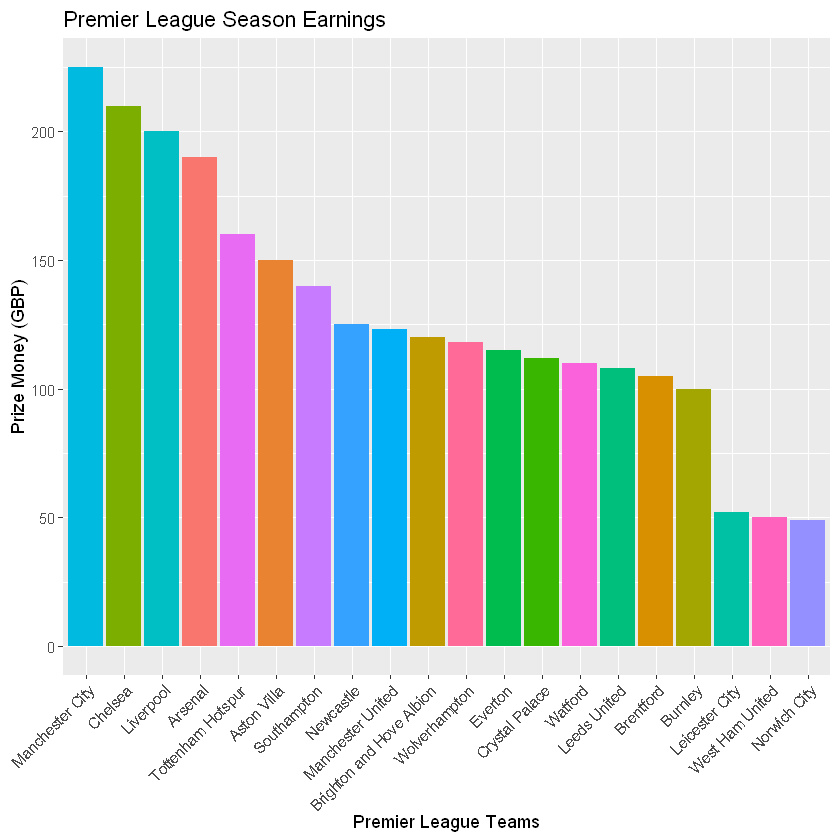

In [99]:
# Visualize rankings/earnings
ggplot(df.earnings, aes(x=reorder(team_names,-prize), y=prize, fill=team_names)) + 
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust=1)) +
  xlab('Premier League Teams') +
  ylab('Prize Money (GBP)') +
  ggtitle('Premier League Season Earnings') +
  theme(legend.position="none")